# Assignment 0: Intro to CS 363D

Your UTCS accounts come with `python` installed but you can’t add packages to it (without root). Especially installing `scipy` and `numpy` on your own can be painful. We recommend using a local install of python, so that you can add any packages you need easily. We will use the python 3 version of [Anaconda](https://docs.continuum.io/), an open-source package and environment manager optimized for data science applications. It’s maintained by Austin-based Continuum Analytics.

## Part 1: Setting up your iPython Notebook

* Make sure you have 2.5 GB free space available before you start installing. Use `baobab` to clear unused files and Chrome’s `.config` litter.
* Download the Anaconda - Python 3.6 zip archive from the [official website](https://www.anaconda.com/download/#download). This file is `~500 MB`, and the uncompressed version will be `~2 GB`.

~~~~
$ wget https://repo.continuum.io/archive/Anaconda3-4.4.0-Linux-x86_64.sh
# current as of this assignment
$ bash Anaconda3-4.4.0-Linux-x86_x64.sh
~~~~

* Accept the license agreement and select an installation directory. (Note that the install location defaults to `~/anaconda3`)
* It will take a few minutes to install. Please be patient.
* It will ask you whether to add it to your bash path (your `~/.bashrc` file). Note that the default is “no”. We recommend saying **yes**.
* Start a **new terminal**. Let’s make sure we’re using Anaconda’s Python we just installed.

~~~~
$ which python
/u/pkar/anaconda3/bin/python
# Note:- your username will appear in the path. Mine is 'pkar'.
~~~~

* Let’s start a notebook server.

~~~~
$ jupyter notebook
~~~~

* It should open a browser tab and start a local server.

<img src="imgs/screen1.png">

* Create a directory for this course (I called mine CS363), and make a new Python 3 notebook.
* Have a go at using the notebook interface. We’ll see more of what we can do with Jupyter notebooks in Part 2.

### Additional Links

* [Stanford CS 231N iPython Tutorial](http://cs231n.github.io/ipython-tutorial/)
* [Jupyter Notebook Beginner Guide](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/)
* [Datacamp Jupyter Notebook Tutorial](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook#gs.PV0TCww)

You may have unforeseen difficulties with this portion of the assignment (not enough disk space, issues with permissions or package versions, conflicts with your personal `.bashrc` or `.zshrc` etc). 
**Please start early** and work with the TA (during office hours) or other classmates to resolve these.

## Part 2: A Simple Data Science Task

For this task we'll be using the 1994 Adult Census Income data (`adult.csv`) collected by Ronny Kohavi and Barry Becker. This is a reasonably clean dataset with both categorical and integer attributes. The dataset consists of `32.5K` rows with 14 attributes.

#### Attributes

You can find a detailed description of the dataset [here](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names).

| Attribute Name 		| Type 				|
| --------------------- | ----------------- |
| age					| continuous		|
| workclass				| categorical		|
| fnlwgt				| continuous		|
| education 			| categorical		|
| education-num			| categorical		|
| marital-status		| categorical		|
| occupation			| categorical		|
| relationship			| categorical		|
| race					| categorical		|
| sex					| categorical		|
| capital-gain			| continuous		|
| capital-loss			| continuous		|
| hours-per-week		| continuous		|
| native-country		| categorical		|

In [163]:
# Standard Headers
# You are welcome to add additional headers if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
pd.__version__

'0.20.3'

In [164]:
# Enable inline mode for matplotlib so that IPython displays graphs.
%matplotlib inline

You can find more on reading (Comma Separated Value) CSV data as a Pandas dataframe [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

In [166]:
# add skipinitialspace=True to skip spaces after delimiter (will be required later for the map function)
adult_data = pd.read_csv("adult.csv", skipinitialspace=True)

# I was having a lot of trouble with the '-' in the attribute names, so I changed them to '_'. I hope this is okay.
adult_data.columns = [c.replace("-", "_") for c in adult_data.columns]


# show the head of the data (first 5 values)
adult_data.head()

age         workclass  fnlwgt    education  education_num  \
0   39         State-gov   77516    Bachelors             13   
1   50  Self-emp-not-inc   83311    Bachelors             13   
2   38           Private  215646      HS-grad              9   
3   53           Private  234721  High-school              7   
4   28           Private  338409    Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country  class  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [167]:
# display data types of various columns in a dataframe
adult_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
class             object
dtype: object

Q1.
1. Group the `adult_data` using the `marital-status` column. You may want to look at the `groupby()` method for dataframes [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html).
2. Display the mean, median and standard deviation statistics of `hours-per-week` column for each `marital-status` column.
3. Which marital status category has the maximum average work hours per week? which has the minimum?
4. Which marital status category has the most variability in work hours per week? which has the least?

In [168]:
# your code here

# 1. Group the data using the marital-status column.
# Grouping the data by marital_status
adult_data.groupby('marital_status')

# Mean, median, and standard deviation
display(adult_data.groupby('marital_status').hours_per_week.mean())
display(adult_data.groupby('marital_status').hours_per_week.median())
display(adult_data.groupby('marital_status').hours_per_week.std())


# 3. The Married-civ-spouse has the maximum average work hours per week. The Widowed has the minimum average.
# 4. The Married-AF-spouse has the most variability in hours per week. The Seperated group has the least variability.

marital_status
Divorced                 41.246680
Married-AF-spouse        41.130435
Married-civ-spouse       43.284856
Married-spouse-absent    39.669856
Never-married            36.939998
Separated                39.301463
Widowed                  32.979859
Name: hours_per_week, dtype: float64

marital_status
Divorced                 40
Married-AF-spouse        40
Married-civ-spouse       40
Married-spouse-absent    40
Never-married            40
Separated                40
Widowed                  40
Name: hours_per_week, dtype: int64

marital_status
Divorced                 10.676632
Married-AF-spouse        19.440596
Married-civ-spouse       11.905047
Married-spouse-absent    11.767374
Never-married            12.432542
Separated                10.377534
Widowed                  14.058690
Name: hours_per_week, dtype: float64

Q2. Show the distribution of the dataset with respect to the `education` column. Which plot is most suitable for this? Use matplotlib (or a library of your choice) to plot the distribution.

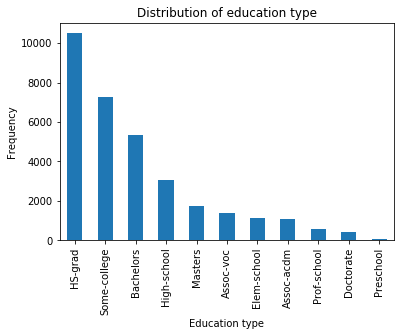

In [169]:
# your code here
adult_data['education'].value_counts().plot(kind='bar')
plt.title("Distribution of education type")
plt.xlabel("Education type")
plt.ylabel("Frequency")

# I think a bar graph is most suited to show the distribution of the dataset, since we are dealing with categorical data (education).

In [170]:
# Please don't change this cell!!
continent_dict = {
    'Cambodia' : 'Asia',
    'Canada' : 'North-America',
    'China' : 'Asia',
    'Columbia' : 'South-America',
    'Cuba' : 'North-America',
    'Dominican-Republic' : 'North-America',
    'Ecuador' : 'South-America',
    'El-Salvador' : 'North-America',
    'England' : 'Europe',
    'France' : 'Europe',
    'Germany' : 'Europe',
    'Greece' : 'Europe',
    'Guatemala' : 'North-America',
    'Haiti' : 'North-America',
    'Holand-Netherlands' : 'Europe',
    'Honduras' : 'North-America',
    'Hong' : 'Asia',
    'Hungary' : 'Europe',
    'India' : 'Asia',
    'Iran' : 'Asia',
    'Ireland' : 'Europe',
    'Italy' : 'Europe',
    'Jamaica' : 'North-America',
    'Japan' : 'Asia',
    'Laos' : 'Asia',
    'Mexico' : 'North-America',
    'Nicaragua' : 'North-America',
    'Outlying-US(Guam-USVI-etc)' : 'North-America',
    'Peru' : 'South-America',
    'Philippines' : 'Asia',
    'Poland' : 'Europe',
    'Portugal' : 'Europe',
    'Puerto-Rico' : 'North-America',
    'Scotland' : 'Europe',
    'South' : 'Other',
    'Taiwan' : 'Asia',
    'Thailand' : 'Asia',
    'Trinadad&Tobago' : 'South-America',
    'United-States' : 'North-America',
    'Vietnam' : 'Asia',
    'Yugoslavia' : 'Europe',
    '?' : 'Other'
}

Q3. Using the dictionary provided above, create a new column called `continent` using the existing `native-country` column in the dataframe. You may want to look at the `map()` method for dataframes.

In [171]:
# You may want to create a deep copy of the initial dataframe object
# so that you can run this cell multiple times without errors.
adult_data_copy = adult_data.copy()
# your code goes here
adult_data_copy['continent'] = adult_data_copy['native_country'].map(continent_dict)
# adult_data_copy.head()
print(adult_data_copy[['fnlwgt', 'native_country']])

       fnlwgt native_country
0       77516  United-States
1       83311  United-States
2      215646  United-States
3      234721  United-States
4      338409           Cuba
5      284582  United-States
6      160187        Jamaica
7      209642  United-States
8       45781  United-States
9      159449  United-States
10     280464  United-States
11     141297          India
12     122272  United-States
13     205019  United-States
14     121772              ?
15     245487         Mexico
16     176756  United-States
17     186824  United-States
18      28887  United-States
19     292175  United-States
20     193524  United-States
21     302146  United-States
22      76845  United-States
23     117037  United-States
24     109015  United-States
25     216851  United-States
26     168294  United-States
27     180211          South
28     367260  United-States
29     193366  United-States
...       ...            ...
32531   33811  United-States
32532  204461  United-States
32533  337992 

Q4. Plot a bar graph showing the average age of working adults from each continent, and show the standard deviation on the same graph.

An example bar plot.
<img src="imgs/screen3.png">

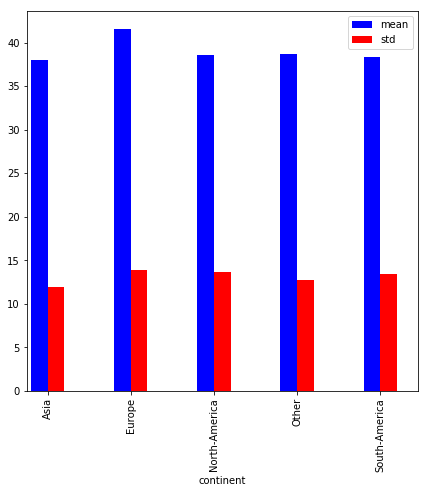

In [172]:
# your code goes here
adult_data_copy.groupby('continent').age.mean().plot(kind = "bar", color = 'blue', position = 1, width = 0.2, figsize = (7,7))
adult_data_copy.groupby('continent').age.std().plot(kind = "bar", color = 'red', position = 0, width = 0.2)
plt.legend(['mean', 'std'])

Q5. To reduce the dimensionality of this dataset, which attribute or attributes would you eliminate? Explain why.

In [173]:
'''Explain why here (as a comment):
    I want to get rid of as many attributes as possible without actually losing too much information. In accordance with this
    strategy, I would first get rid of the education attribute, as it seems to be related to the education_num attribute.
    If needed, we can retrieve it.
    Additionally, the relationship attribute seems superfluous, given that we have the marital_status and sex attributes.
    workclass is another one, given that we have the actual occupation.
'''

'Explain why here (as a comment):\n    I want to get rid of as many attributes as possible without actually losing too much information. In accordance with this\n    strategy, I would first get rid of the education attribute, as it seems to be related to the education_num attribute.\n    If needed, we can retrieve it.\n    Additionally, the relationship attribute seems superfluous, given that we have the marital_status and sex attributes.\n    workclass is another one, given that we have the actual occupation.\n'

## Part 3: Handling Missing Values

For this task we'll be using a subset of the leaf dataset created by professors from University of Porto, Portugal. This dataset consists in a collection of shape and texture features extracted from digital images of leaf specimens originating from a total of 40 different plant species, but for the purpose of this assignment we're only going to consider 4 plant species.

You can find more information about the dataset [here](http://archive.ics.uci.edu/ml/datasets/Leaf).

<img src="imgs/screen4.png">

In [174]:
leaf_data = pd.read_csv("leaf.csv")

# Again, I was having a lot of trouble with the '-' in the attribute names, so I changed them to '_'. I hope this is okay.
leaf_data.columns = [c.replace("-", "_") for c in leaf_data.columns]

leaf_data.head()

class  eccentricity  aspect_ratio  elongation  solidity  \
0      1           NaN        1.0118     0.63010   0.57134   
1      4       0.99512       10.3770     0.90564   0.92135   
2      3       0.19287        1.0551     0.25044   0.93641   
3      1       0.52212        1.1191     0.70988   0.50678   
4      3       0.33254        1.1208     0.27473   0.93625   

   stochastic_convexity  isoperimetric_factor  maximal_indentation_depth  \
0               0.81053               0.16187                   0.111150   
1               0.99825               0.17941                   0.016647   
2               0.99474               0.47284                   0.019693   
3               0.64912               0.14120                   0.131920   
4               0.99474               0.49836                   0.024394   

   lobedness  average_intensity  average_contrast  smoothness  third_moment  \
0   2.248600           0.027309          0.088889    0.007839      0.002273   
1   0.050433           0.020400          0.071662    0.005109      0.001266   
2   0.070581           0.055935          0.130300    0.016694      0.004583   
3   3.167400           0.025478          0.085964    0.007336      0.002179   
4   0.108300           0.108090          0.168820    0.027709      0.005981   

   uniformity  entropy  
0    0.000175  0.86000  
1    0.000170  0.71514  
2    0.000440  1.41110  
3    0.000149  0.82809  
4    0.001234  2.48660

Q6. Eccentricity of the leaf is a measure of how much the shape of the leaf varies from a perfect circle. Unfortunately the dataset is missing values in the `eccentricity` column. Fill in these missing values with something reasonable.

In [175]:
# your code goes here
# I shall replace the missing values in 'eccentricity' with the mean of all the other 'eccentricity' values.
replace_val = leaf_data.eccentricity.dropna().mean()
leaf_data['eccentricity'] = leaf_data.eccentricity.fillna(replace_val)
leaf_data.head()

class  eccentricity  aspect_ratio  elongation  solidity  \
0      1      0.567526        1.0118     0.63010   0.57134   
1      4      0.995120       10.3770     0.90564   0.92135   
2      3      0.192870        1.0551     0.25044   0.93641   
3      1      0.522120        1.1191     0.70988   0.50678   
4      3      0.332540        1.1208     0.27473   0.93625   

   stochastic_convexity  isoperimetric_factor  maximal_indentation_depth  \
0               0.81053               0.16187                   0.111150   
1               0.99825               0.17941                   0.016647   
2               0.99474               0.47284                   0.019693   
3               0.64912               0.14120                   0.131920   
4               0.99474               0.49836                   0.024394   

   lobedness  average_intensity  average_contrast  smoothness  third_moment  \
0   2.248600           0.027309          0.088889    0.007839      0.002273   
1   0.050433           0.020400          0.071662    0.005109      0.001266   
2   0.070581           0.055935          0.130300    0.016694      0.004583   
3   3.167400           0.025478          0.085964    0.007336      0.002179   
4   0.108300           0.108090          0.168820    0.027709      0.005981   

   uniformity  entropy  
0    0.000175  0.86000  
1    0.000170  0.71514  
2    0.000440  1.41110  
3    0.000149  0.82809  
4    0.001234  2.48660

Q7. Normalize the `eccentricity` column. Where `value_norm = (value - mean(value)) / std(value)`. Display the head of the new data frame.

In [176]:
# your code goes here
# store values of mean and std
me = leaf_data.eccentricity.mean()
sd = leaf_data.eccentricity.std()
leaf_data['eccentricity'] = leaf_data['eccentricity'].apply(lambda x: (x - me) / (sd))
leaf_data.head()

class  eccentricity  aspect_ratio  elongation  solidity  \
0      1      0.000000        1.0118     0.63010   0.57134   
1      4      1.763441       10.3770     0.90564   0.92135   
2      3     -1.545119        1.0551     0.25044   0.93641   
3      1     -0.187259        1.1191     0.70988   0.50678   
4      3     -0.969106        1.1208     0.27473   0.93625   

   stochastic_convexity  isoperimetric_factor  maximal_indentation_depth  \
0               0.81053               0.16187                   0.111150   
1               0.99825               0.17941                   0.016647   
2               0.99474               0.47284                   0.019693   
3               0.64912               0.14120                   0.131920   
4               0.99474               0.49836                   0.024394   

   lobedness  average_intensity  average_contrast  smoothness  third_moment  \
0   2.248600           0.027309          0.088889    0.007839      0.002273   
1   0.050433           0.020400          0.071662    0.005109      0.001266   
2   0.070581           0.055935          0.130300    0.016694      0.004583   
3   3.167400           0.025478          0.085964    0.007336      0.002179   
4   0.108300           0.108090          0.168820    0.027709      0.005981   

   uniformity  entropy  
0    0.000175  0.86000  
1    0.000170  0.71514  
2    0.000440  1.41110  
3    0.000149  0.82809  
4    0.001234  2.48660

Q8. Plot a scatter plot between `smoothness` and normalized `eccentricity`. Place `smoothness` on the X axis.

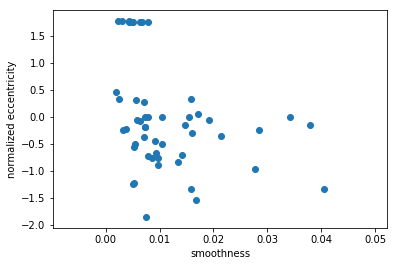

In [177]:
# your code goes here
plt.scatter(leaf_data.smoothness, leaf_data.eccentricity)
plt.xlabel('smoothness')
plt.ylabel('normalized eccentricity')

Q9. Now plot the same scatter plot as Q7 but give a different color to each `class` label. What can you infer from this plot (provide a short answer in the form of comments)?

'Inferences from the colored scatterplot:\n   Just by sight, we can see that the black dots (class 4) are clustered at the top left with only one exception,\n   meaning they tend to have low smoothness and high eccentricity.\n   Aqua points (class 2) have varying eccentricity, but all have smoothness values < 0.02.\n   Conversely, yellow points (class 3) have varying smoothness, but their eccentricity seems to have an upper bound,\n   being a z-score of 0 (roughly). Class 3 seems to be the most diverse.\n   Class 1 (red) seem to group towards the bottom right more than other classes, suggesting that they tend to have\n   low smoothness and eccentricity.'

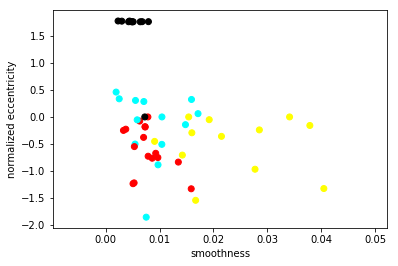

In [178]:
# your code goes here
# I want to see all the unique values of 'class', to better determine colors.
# leaf_data['class'].unique()
colors = {1: 'red', 2: 'aqua', 3: 'yellow', 4: 'black'}
plt.scatter(leaf_data.smoothness, leaf_data.eccentricity, c = leaf_data['class'].map(colors))
plt.xlabel('smoothness')
plt.ylabel('normalized eccentricity')

'''Inferences from the colored scatterplot:
   Just by sight, we can see that the black dots (class 4) are clustered at the top left with only one exception,
   meaning they tend to have low smoothness and high eccentricity.
   Aqua points (class 2) have varying eccentricity, but all have smoothness values < 0.02.
   Conversely, yellow points (class 3) have varying smoothness, but their eccentricity seems to have an upper bound,
   being a z-score of 0 (roughly). Class 3 seems to be the most diverse.
   Class 1 (red) seem to group towards the bottom right more than other classes, suggesting that they tend to have
   low smoothness and eccentricity.'''

Q10. Calculate the correlation between the normalized `eccentricity` and the `smoothness` column. 

In [179]:
# your code goes here
leaf_data.smoothness.corr(leaf_data.eccentricity)

-0.35441842207550001

Q11. Create a plot to determine if there are any outliers in the `average-contrast` attribute.

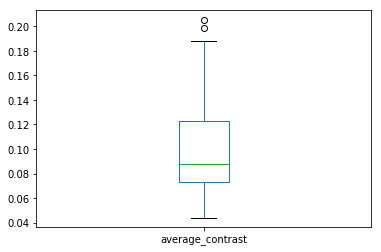

In [180]:
# your code goes here
leaf_data.average_contrast.plot(kind = 'box')

# Clearly, there are outliers (denoted by the circles at the top of the plot).